In [1]:
import requests as rq
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
Game1_summary = pd.read_csv('SeattleToronto_Game1_Summary.csv')
game1 = Game1_summary.iloc[:,:]
Game1_defense = pd.read_csv('Seattle_Game1_Defense.csv')
game1 = game1.merge(Game1_defense)
Game1_misc = pd.read_csv('SeattleToronto_Game1_Misc.csv')
game1 = game1.merge(Game1_misc)
Game1_passing = pd.read_csv('SeattleToronto_Game1_Passing.csv')
game1 = game1.merge(Game1_passing)
Game1_passType = pd.read_csv('SeattleToronto_Game1_PassType.csv')
game1 = game1.merge(Game1_passType)
Game1_possession = pd.read_csv('SeattleToronto_Game1_Possession.csv')
game1 = game1.merge(Game1_possession)
Game1_shots = pd.read_csv('SeattleToronto_Game1_Shots.csv')
Game1_shots = Game1_shots.fillna('No Input')

game1 = game1.fillna(0)
for i in range(len(game1['Player'])):
    game1.iloc[i,0]=game1.iloc[i,0].split('\\')[0]
    game1.iloc[i,2]=game1.iloc[i,2].split(' ')[1]

In [133]:
Game2_summary = pd.read_csv('Seattle_Game2_Summary.csv')
atLAFC = Game2_summary.iloc[:,:]
Game2_defense = pd.read_csv('Seattle_Game2_Defense.csv')
atLAFC = atLAFC.merge(Game2_defense)
Game2_misc = pd.read_csv('Seattle_Game2_Misc.csv')
atLAFC = atLAFC.merge(Game2_misc)
Game2_passing = pd.read_csv('Seattle_Game2_Passing.csv')
atLAFC = atLAFC.merge(Game2_passing)
Game2_passType = pd.read_csv('Seattle_Game2_PassType.csv')
atLAFC = atLAFC.merge(Game2_passType)
Game2_possession = pd.read_csv('Seattle_Game2_Possession.csv')
atLAFC = atLAFC.merge(Game2_possession)
atLAFC_shots = pd.read_csv('Seattle_Game2_Shots.csv')
atLAFC_shots = atLAFC_shots.fillna('No Input')

atLAFC = atLAFC.fillna(0)
for i in range(len(atLAFC['Player'])):
    atLAFC.iloc[i,0]=atLAFC.iloc[i,0].split('\\')[0]
    atLAFC.iloc[i,2]=atLAFC.iloc[i,2].split(' ')[1]

In [134]:
Game3_summary = pd.read_csv('Seattle_Game3_Summary.csv')
vsLAFC = Game3_summary.iloc[:,:]
Game3_defense = pd.read_csv('Seattle_Game3_Defense.csv')
vsLAFC = vsLAFC.merge(Game3_defense)
Game3_misc = pd.read_csv('Seattle_Game3_Misc.csv')
vsLAFC = vsLAFC.merge(Game3_misc)
Game3_passing = pd.read_csv('Seattle_Game3_Passing.csv')
vsLAFC = vsLAFC.merge(Game3_passing)
Game3_passType = pd.read_csv('Seattle_Game3_PassType.csv')
vsLAFC = vsLAFC.merge(Game3_passType)
Game3_possession = pd.read_csv('Seattle_Game3_Possession.csv')
vsLAFC = vsLAFC.merge(Game3_possession)
vsLAFC_shots = pd.read_csv('Seattle_Game3_Shots.csv')
vsLAFC_shots = vsLAFC_shots.fillna('No Input')

vsLAFC = vsLAFC.fillna(0)
for i in range(len(vsLAFC['Player'])):
    vsLAFC.iloc[i,0]=vsLAFC.iloc[i,0].split('\\')[0]
    vsLAFC.iloc[i,2]=vsLAFC.iloc[i,2].split(' ')[1]

In [135]:
Game4_summary = pd.read_csv('Seattle_Game4_Summary.csv')
ConfFinals = Game4_summary.iloc[:,:]
Game4_defense = pd.read_csv('Seattle_Game4_Defense.csv')
ConfFinals = ConfFinals.merge(Game4_defense)
Game4_misc = pd.read_csv('Seattle_Game4_Misc.csv')
ConfFinals = ConfFinals.merge(Game4_misc)
Game4_passing = pd.read_csv('Seattle_Game4_Passing.csv')
ConfFinals = ConfFinals.merge(Game4_passing)
Game4_passType = pd.read_csv('Seattle_Game4_PassType.csv')
ConfFinals = ConfFinals.merge(Game4_passType)
Game4_possession = pd.read_csv('Seattle_Game4_Possession.csv')
ConfFinals = ConfFinals.merge(Game4_possession)
ConfFinals_shots = pd.read_csv('Seattle_Game4_Shots.csv')
ConfFinals_shots = ConfFinals_shots.fillna('No Input')

ConfFinals = ConfFinals.fillna(0)
for i in range(len(ConfFinals['Player'])):
    ConfFinals.iloc[i,0]=ConfFinals.iloc[i,0].split('\\')[0]
    ConfFinals.iloc[i,2]=ConfFinals.iloc[i,2].split(' ')[1]

In [7]:
## Just checking stuff...
print(ConfFinals['Ttl_Pass_Cmp%'].sum())
print(ConfFinals['Ttl_Pass_Att'].sum())
print(ConfFinals['Ttl_Pass_Cmp'].sum())
print (ConfFinals['Ttl_Pass_Cmp'].sum()/ConfFinals['Ttl_Pass_Att'].sum())

2093.3
1015
827
0.8147783251231527


In [73]:
## Function to get team totals, accounting for % columns.
def TeamTotals(df):
    teamSums = df.groupby(['Team']).sum()
    for i in range(len(teamSums.columns)):
        if '%' in teamSums.columns[i]:          
            if teamSums.iloc[0,i-2] <= teamSums.iloc[0,i-1]:
                teamSums.iloc[0,i] = round(teamSums.iloc[0,i-2]/teamSums.iloc[0,i-1], 4)
            else:
                teamSums.iloc[0,i] = round(teamSums.iloc[0,i-1]/teamSums.iloc[0,i-2], 4)
                
            if teamSums.iloc[1,i-2] <= teamSums.iloc[1,i-1]:
                teamSums.iloc[1,i] = round(teamSums.iloc[1,i-2]/teamSums.iloc[0,i-1], 4)
            else:
                teamSums.iloc[1,i] = round(teamSums.iloc[1,i-1]/teamSums.iloc[0,i-2], 4)
    return teamSums

In [140]:
allShots.to_csv('AllShots.csv')

In [141]:
## Merging all shot cahrts into one df

allShots = atLAFC_shots.append(vsLAFC_shots)
allShots = allShots.append(ConfFinals_shots)
for i in range(len(allShots['Player'])):
    allShots.iloc[i,1]=allShots.iloc[i,1].split('\\')[0]
allShots

,Minute,Player,Team,GameID,Outcome,xG,PSxG,Distance,Body Part,Notes,SCA1_Player,SCA1_Event,SCA2_Player,SCA2_Event
0,9.0,Jordan Harvey,Los Angeles FC,2,Off Target,0.02,No Input,8,Head,No Input,Mark-Anthony Kaye,Pass (Dead),Mark-Anthony Kaye,Pass (Live)
1,10.0,Diego Rossi,Los Angeles FC,2,Off Target,0.03,No Input,15,Left Foot,No Input,Mark-Anthony Kaye,Pass (Live),Carlos Vela,Pass (Live)
2,12.0,Carlos Vela,Los Angeles FC,2,Goal,0.32,0.61,14,Left Foot,No Input,Mark-Anthony Kaye,Pass (Live),Eduard Atuesta,Pass (Live)
3,14.0,Kim Kee-hee,Seattle,2,Saved,0.03,0.09,12,Head,No Input,Víctor Rodríguez,Pass (Live),Kelvin Leerdam,Pass (Live)
4,21.0,Carlos Vela,Los Angeles FC,2,Off Target,0.02,No Input,16,Left Foot,No Input,Mark-Anthony Kaye,Pass (Dead),No Input,No Input
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,87.0,Brad Smith,SEA,4,Off Target,0.05,No Input,16,Left Foot,No Input,Raúl Ruidíaz,Pass (Live),No Input,No Input
23,91.0,Adama Diomande,LAFC,4,Off Target,0.07,No Input,13,Right Foot,First touch Half volley,Mark-Anthony Kaye,Pass (Live),Eduard Atuesta,Pass (Live)
24,92.0,Adrien Perez,LAFC,4,Blocked,0.02,No Input,28,Left Foot,No Input,Eduard Atuesta,Pass (Live),Eddie Segura,Pass (Live)
25,93.0,Adrien Perez,LAFC,4,Wayward,0.03,No Input,16,Right Foot,First touch Volley,Carlos Vela,Pass (Dead),Adrien Perez,Shot


In [142]:
allShots.to_csv('allShots.csv')

In [60]:
## Merging all games vs LAFC into one df
allLAFC = atLAFC.append(vsLAFC)
allLAFC = allLAFC.append(ConfFinals)
allLAFC = allLAFC.set_index('Player')
allLAFC

# dropping unecessary columns
allLAFC = allLAFC.drop(allLAFC[['PK', 'PKatt', 'npxG', 'BlockedShotsOnTrgt', '2CrdY', 'PKwon', 'PKcon',
                               'OG', 'Pass_Cmp', 'Pass_Att', 'Pass_Cmp%', 'PassAtt', 'PassCmpltd']], axis=1)

,#,Nation,Pos,Team,GameID,Min,Gls,Ast,PK,PKatt,...,DrblSucc%,DrblPast#Pl,DrblMegs,CarriesTotDist,CarriesPrgDist,PassTarget,PassRec,PassRec%,Miscontrol,Dispos
Player,,,,,,,,,,,,,,,,,,,,,
Jordan Morris,13,USA,FW,SEA,2,68,0,0,0,0,...,100.0,2,0,135,29,24,12,50.0,2,0
Henry Wingo,23,USA,FW,SEA,2,22,0,0,0,0,...,0.0,0,0,63,44,8,4,50.0,0,2
Víctor Rodríguez,8,ESP,LW,SEA,2,64,0,1,0,0,...,33.3,1,0,208,147,27,24,88.9,2,1
Nouhou Tolo,5,CMR,LBLW,SEA,2,26,0,0,0,0,...,50.0,1,0,64,30,10,9,90.0,0,0
Harry Shipp,19,USA,RW,SEA,2,90,1,0,0,0,...,0.0,0,0,61,29,32,23,71.9,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jordan Harvey,2,USA,LB,LAFC,4,90,0,0,0,0,...,0.0,0,0,310,145,73,71,97.3,1,1
Eddie Segura,4,COL,CB,LAFC,4,90,0,0,0,0,...,0.0,0,0,361,257,67,65,97.0,1,0
Walker Zimmerman,25,USA,CB,LAFC,4,90,0,0,0,0,...,0.0,0,0,177,105,36,36,100.0,0,0


In [26]:
## Figuring out how to get stats per team per game
print(allLAFC['CarriesPrgDist'].groupby([allLAFC['GameID'], allLAFC['Team']]).sum())#.sort_values())
# print(allLAFC['CarriesPrgDist'].groupby(allLAFC.index).mean().sort_values())

# print(allLAFC['CarriesPrgDist'].groupby(allLAFC['Team']).sum().sort_values())

GameID  Team
2       LAFC    1373
        SEA     1024
3       LAFC    1789
        SEA      609
4       LAFC    1832
        SEA      838
Name: CarriesPrgDist, dtype: int64


In [33]:
## Printing ALLLLL stats per team per game for exploration, not accounting for % columns
counttt = 0
for i in allLAFC.columns[6:]:
    print(i,':')
    print(allLAFC[i].groupby([allLAFC['GameID'], allLAFC['Team']]).sum())
    print()
    counttt+=1
    
print(counttt)

Gls :
GameID  Team
2       LAFC    4
        SEA     1
3       LAFC    1
        SEA     1
4       LAFC    1
        SEA     3
Name: Gls, dtype: int64

Ast :
GameID  Team
2       LAFC    4
        SEA     1
3       LAFC    1
        SEA     0
4       LAFC    0
        SEA     3
Name: Ast, dtype: int64

PK :
GameID  Team
2       LAFC    0
        SEA     0
3       LAFC    0
        SEA     0
4       LAFC    0
        SEA     0
Name: PK, dtype: int64

PKatt :
GameID  Team
2       LAFC    0
        SEA     0
3       LAFC    0
        SEA     0
4       LAFC    0
        SEA     0
Name: PKatt, dtype: int64

Sh :
GameID  Team
2       LAFC    16
        SEA      6
3       LAFC    22
        SEA      5
4       LAFC    15
        SEA     12
Name: Sh, dtype: int64

SoT :
GameID  Team
2       LAFC    8
        SEA     2
3       LAFC    5
        SEA     4
4       LAFC    4
        SEA     5
Name: SoT, dtype: int64

CrdY :
GameID  Team
2       LAFC    1
        SEA     4
3       LAFC    2
        

Name: PKcon, dtype: int64

OG :
GameID  Team
2       LAFC    0
        SEA     0
3       LAFC    0
        SEA     0
4       LAFC    0
        SEA     0
Name: OG, dtype: int64

Recov :
GameID  Team
2       LAFC     79
        SEA      96
3       LAFC    120
        SEA      71
4       LAFC    116
        SEA      80
Name: Recov, dtype: int64

AerialWon :
GameID  Team
2       LAFC    12
        SEA      3
3       LAFC    13
        SEA     12
4       LAFC    14
        SEA     12
Name: AerialWon, dtype: int64

AerialLost :
GameID  Team
2       LAFC     3
        SEA     12
3       LAFC    12
        SEA     13
4       LAFC    12
        SEA     14
Name: AerialLost, dtype: int64

AerialWon% :
GameID  Team
2       LAFC    300.0
        SEA     133.3
3       LAFC    371.6
        SEA     391.7
4       LAFC    471.7
        SEA     616.7
Name: AerialWon%, dtype: float64

Ttl_Pass_Cmp :
GameID  Team
2       LAFC    511
        SEA     314
3       LAFC    628
        SEA     161
4       LAFC 

Name: PassRec, dtype: int64

PassRec% :
GameID  Team
2       LAFC    1127.5
        SEA     1169.8
3       LAFC    1195.2
        SEA      891.6
4       LAFC    1256.5
        SEA     1107.2
Name: PassRec%, dtype: float64

Miscontrol :
GameID  Team
2       LAFC    15
        SEA     17
3       LAFC    14
        SEA     15
4       LAFC    20
        SEA     15
Name: Miscontrol, dtype: int64

Dispos :
GameID  Team
2       LAFC    17
        SEA     10
3       LAFC    14
        SEA      7
4       LAFC    24
        SEA      9
Name: Dispos, dtype: int64

120


In [37]:
## Bad try to do same as last cell but account for %
for i in range(6,len(allLAFC.columns)):
    print(allLAFC.columns[i],':')
    if '%' in allLAFC.columns[i]:          
        if allLAFC.iloc[:,i-2].sum() <= allLAFC.iloc[0,i-1].sum():
            print(allLAFC.iloc[:,i-2].sum()/allLAFC.iloc[0,i-1].sum())
            print(allLAFC.iloc[:,i].groupby([allLAFC['GameID'], allLAFC['Team']]).sum())
        else:
            print(allLAFC.iloc[0,i-1].sum()/allLAFC.iloc[:,i-2].sum())
    else:        
        print(allLAFC.iloc[:,i].groupby([allLAFC['GameID'], allLAFC['Team']]).sum())
    print()

Gls :
GameID  Team
2       LAFC    4
        SEA     1
3       LAFC    1
        SEA     1
4       LAFC    1
        SEA     3
Name: Gls, dtype: int64

Ast :
GameID  Team
2       LAFC    4
        SEA     1
3       LAFC    1
        SEA     0
4       LAFC    0
        SEA     3
Name: Ast, dtype: int64

PK :
GameID  Team
2       LAFC    0
        SEA     0
3       LAFC    0
        SEA     0
4       LAFC    0
        SEA     0
Name: PK, dtype: int64

PKatt :
GameID  Team
2       LAFC    0
        SEA     0
3       LAFC    0
        SEA     0
4       LAFC    0
        SEA     0
Name: PKatt, dtype: int64

Sh :
GameID  Team
2       LAFC    16
        SEA      6
3       LAFC    22
        SEA      5
4       LAFC    15
        SEA     12
Name: Sh, dtype: int64

SoT :
GameID  Team
2       LAFC    8
        SEA     2
3       LAFC    5
        SEA     4
4       LAFC    4
        SEA     5
Name: SoT, dtype: int64

CrdY :
GameID  Team
2       LAFC    1
        SEA     4
3       LAFC    2
        

Name: MedPass_Att, dtype: int64

MedPass_Cmp% :
0.005708354955889984

LngPass_Cmp :
GameID  Team
2       LAFC     99
        SEA      86
3       LAFC    126
        SEA      39
4       LAFC     91
        SEA      45
Name: LngPass_Cmp, dtype: int64

LngPass_Att :
GameID  Team
2       LAFC    127
        SEA     133
3       LAFC    164
        SEA      90
4       LAFC    128
        SEA      96
Name: LngPass_Att, dtype: int64

LngPass_Cmp% :
0.0102880658436214

KeyPass :
GameID  Team
2       LAFC    13
        SEA      4
3       LAFC    17
        SEA      3
4       LAFC     7
        SEA     10
Name: KeyPass, dtype: int64

PassToFinalThird :
GameID  Team
2       LAFC    34
        SEA     28
3       LAFC    70
        SEA      9
4       LAFC    56
        SEA     10
Name: PassToFinalThird, dtype: int64

PassToPA :
GameID  Team
2       LAFC    13
        SEA      8
3       LAFC    20
        SEA      0
4       LAFC    15
        SEA      3
Name: PassToPA, dtype: int64

CrsToPA :
GameID 

In [14]:
means = allLAFC['Pass_Cmp'].groupby([allLAFC['GameID'], allLAFC['Team']]).sum()
means

GameID  Team
2       LAFC    511
        SEA     314
3       LAFC    628
        SEA     161
4       LAFC    605
        SEA     222
Name: Pass_Cmp, dtype: int64

In [66]:
byTeamByGame = allLAFC.groupby([allLAFC['GameID'], allLAFC['Team']]).sum()
byTeamByGame['Possession'] = [.42,.58,.26,.74,.31,.69,]
byTeamByGame

#  Min  Gls  Ast  Sh  SoT  CrdY  CrdR  Touches  Press  ...  \
GameID Team                                                           ...   
2      LAFC  177  990    4    4  16    8     1     0      722    136  ...   
       SEA   212  990    1    1   6    2     4     0      521    102  ...   
3      LAFC  203  990    1    1  22    5     2     0      845    164  ...   
       SEA   281  916    1    0   5    4     2     2      386    150  ...   
4      LAFC  285  990    1    0  15    4     0     0      834    120  ...   
       SEA   229  990    3    3  12    5     2     0      457    197  ...   

             DrblPast#Pl  DrblMegs  CarriesTotDist  CarriesPrgDist  \
GameID Team                                                          
2      LAFC           16         3            2601            1373   
       SEA            11         2            1906            1024   
3      LAFC           16         1            3585            1789   
       SEA            11         2            1057             609   
4      LAFC           32         3            3409            1832   
       SEA            15         1            1503             838   

             PassTarget  PassRec  PassRec%  Miscontrol  Dispos  Possession  
GameID Team                                                                 
2      LAFC         564      511    1127.5          15      17        0.42  
       SEA          372      314    1169.8          17      10        0.58  
3      LAFC         717      628    1195.2          14      14        0.26  
       SEA          250      161     891.6          15       7        0.74  
4      LAFC         669      605    1256.5          20      24        0.31  
       SEA          288      222    1107.2          15       9        0.69  

[6 rows x 110 columns]

In [127]:
byTeamByGame.to_csv('SEAvsLAFC_ByTeamByGame.csv')
allLAFC.to_csv('SEAvsLAFC_AllGames.csv')

In [109]:
forPressChart = allLAFC.groupby([allLAFC['Team'], allLAFC['GameID']]).sum()
forPressChart['Possession'] = [.42,.58,.26,.74,.31,.69,]

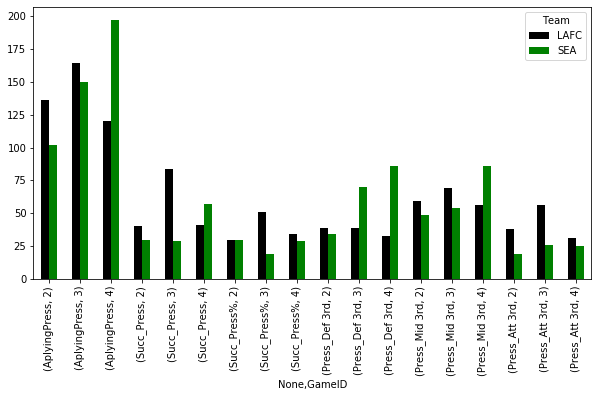

In [126]:
PressChart = forPressChart[['AplyingPress',
       'Succ_Press', 'Succ_Press%', 'Press_Def 3rd', 'Press_Mid 3rd',
       'Press_Att 3rd']]
forPressChart.loc[:,'Succ_Press%'] = round(forPressChart.loc[:,'Succ_Press']/forPressChart.loc[:,'AplyingPress'], 4)*100

# qwe.plot.bar(figsize=(10,5))
# PressChart.plot.bar(figsize=(10,5))
# poi.plot.bar(figsize=(10,5))
lkj.plot.bar(figsize=(10,5), color='kg')




In [118]:
qwe = PressChart.unstack()
qwe

AplyingPress           Succ_Press         Succ_Press%                \
GameID            2    3    4          2   3   4           2      3      4   
Team                                                                         
LAFC            136  164  120         40  84  41       29.41  51.22  34.17   
SEA             102  150  197         30  29  57       29.41  19.33  28.93   

       Press_Def 3rd         Press_Mid 3rd         Press_Att 3rd          
GameID             2   3   4             2   3   4             2   3   4  
Team                                                                      
LAFC              39  39  33            59  69  56            38  56  31  
SEA               34  70  86            49  54  86            19  26  25

In [119]:
PressChart

AplyingPress  Succ_Press  Succ_Press%  Press_Def 3rd  \
Team GameID                                                         
LAFC 2                136          40        29.41             39   
     3                164          84        51.22             39   
     4                120          41        34.17             33   
SEA  2                102          30        29.41             34   
     3                150          29        19.33             70   
     4                197          57        28.93             86   

             Press_Mid 3rd  Press_Att 3rd  
Team GameID                                
LAFC 2                  59             38  
     3                  69             56  
     4                  56             31  
SEA  2                  49             19  
     3                  54             26  
     4                  86             25

In [120]:
poi = PressChart.T
# poi = poi.unstack()
poi

Team             LAFC                     SEA                
GameID              2       3       4       2       3       4
AplyingPress   136.00  164.00  120.00  102.00  150.00  197.00
Succ_Press      40.00   84.00   41.00   30.00   29.00   57.00
Succ_Press%     29.41   51.22   34.17   29.41   19.33   28.93
Press_Def 3rd   39.00   39.00   33.00   34.00   70.00   86.00
Press_Mid 3rd   59.00   69.00   56.00   49.00   54.00   86.00
Press_Att 3rd   38.00   56.00   31.00   19.00   26.00   25.00

In [121]:
lkj = qwe.T
lkj

Team                    LAFC     SEA
              GameID                
AplyingPress  2       136.00  102.00
              3       164.00  150.00
              4       120.00  197.00
Succ_Press    2        40.00   30.00
              3        84.00   29.00
              4        41.00   57.00
Succ_Press%   2        29.41   29.41
              3        51.22   19.33
              4        34.17   28.93
Press_Def 3rd 2        39.00   34.00
              3        39.00   70.00
              4        33.00   86.00
Press_Mid 3rd 2        59.00   49.00
              3        69.00   54.00
              4        56.00   86.00
Press_Att 3rd 2        38.00   19.00
              3        56.00   26.00
              4        31.00   25.00

# NEXT

In [ ]:
# Checking ratios b/w: carries vs. passes and their distances, 